In [1]:
import pandas  as  pd
import  numpy as np 


In [2]:
import  pandas as pd  
import  numpy as np
import sklearn as  sk  
import  matplotlib  as  pt  

test

In [3]:
data  = pd.read_csv('/home/anas-nouri/chatBotAPP/datasets/loyalty_card_datasets/customer_shopping_data.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   cpinvoice_no    99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [5]:
data.isnull().sum()

cpinvoice_no      0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

droping columns  with  missing value  


In [6]:
# droping  rows with any missing values 
data_cleaned  =   data.dropna() 


In [7]:
# dropong columns with  missing  value 
data_dropin_column  =  data.dropna(subset=['gender'])

Fill missing values

In [8]:

data['age'] = data['age'].fillna(data['age'].max())
data['age'] = data['age'].fillna(data['age'].mean())
data['age'] = data['age'].fillna(data['age'].fillna(0))
data['age'] = data['age'].fillna(data['age'].median(0))
data['age'] = data['age'].fillna(data['age'].mode()[0])


In [9]:
data.fillna(method='ffill',inplace=True)

/tmp/ipykernel_9279/286314875.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill',inplace=True)


In [10]:
data.fillna(method='bfill',inplace=True)

/tmp/ipykernel_9279/1664202156.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='bfill',inplace=True)


check if there is  still the  missing value 

In [11]:
print(data.isnull().sum())

cpinvoice_no      0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64


In [12]:
# number  of duplicate  rows
data.duplicated().sum()

0

In [13]:
data_after_cleaning_duplicates_rows =  data.drop_duplicates()

In [14]:
data.columns

Index(['cpinvoice_no', 'customer_id', 'gender', 'age', 'category', 'quantity',
       'price', 'payment_method', 'invoice_date', 'shopping_mall'],
      dtype='object')

In [15]:
# drop  duplicated based on column name  "id "
data_after_remove_duplicated_rows = data.drop_duplicates(subset=['customer_id'], keep='last')

Detect outliers using based statistics

using method describe 

In [16]:
data.describe()

,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321
std,14.990054,1.413025,941.184567
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


In [17]:
Q1 =data['age'].quantile(0.25)
Q3 = data['age'].quantile(0.75)


In [18]:
IQR = Q3-Q1
lower = Q1 -1.5*IQR
Upper = Q3+1.5*IQR

deteect outliers  

In [19]:
outliers  = data[(data['age']<=Q1)|(data['age']>=Q3)]

In [20]:
outliers

,cpinvoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
5,I227836,C657758,Female,28,Clothing,5,1500.40,Credit Card,24/05/2022,Forum Istanbul
...,...,...,...,...,...,...,...,...,...,...
99449,I134399,C953724,Male,65,Clothing,1,300.08,Cash,1/1/2023,Kanyon
99450,I170504,C226974,Female,28,Books,1,15.15,Cash,28/02/2023,Zorlu Center
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity


remove  outliers  

In [21]:
data_no_outliers =  data[(data['age']<Q3)&(data['age']>Q1)]

In [22]:
data_no_outliers

,cpinvoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon
6,I121056,C151197,Female,49,Cosmetics,1,40.66,Cash,13/03/2022,Istinye Park
7,I293112,C176086,Female,32,Clothing,2,600.16,Credit Card,13/01/2021,Mall of Istanbul
10,I306368,C240286,Female,36,Food & Beverage,2,10.46,Cash,25/12/2022,Metrocity
17,I195744,C330667,Female,42,Food & Beverage,3,15.69,Credit Card,5/1/2022,Zorlu Center
...,...,...,...,...,...,...,...,...,...,...
99446,I327966,C107209,Female,32,Food & Beverage,1,5.23,Cash,5/2/2023,Metropol AVM
99447,I281214,C288090,Female,37,Toys,3,107.52,Cash,21/02/2021,Metropol AVM
99451,I675411,C513603,Male,50,Toys,5,179.20,Cash,9/10/2021,Metropol AVM
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon


In [23]:
data

,cpinvoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


In [24]:
data['age'] = data['age'].clip(lower,Upper)

In [25]:
data

,cpinvoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


In [26]:
from  scipy import stats

In [27]:
Zscore =np.abs(stats.zscore(data['age']))

In [28]:
Zscore

array([1.02916019, 1.49613885, 1.56285009, ..., 1.30573309, 0.83875444,
       0.4954703 ])

In [29]:
outliers = data[Zscore>3]

In [30]:
outliers

,cpinvoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall


In [31]:
data['age']

0        28
1        21
2        20
3        66
4        53
         ..
99452    45
99453    27
99454    63
99455    56
99456    36
Name: age, Length: 99457, dtype: int64

In [32]:
!pip  install seaborn


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [33]:
import matplotlib.pyplot as  plt
import seaborn as  sns


In [34]:
num_clo = data.select_dtypes(include=np.number).columns

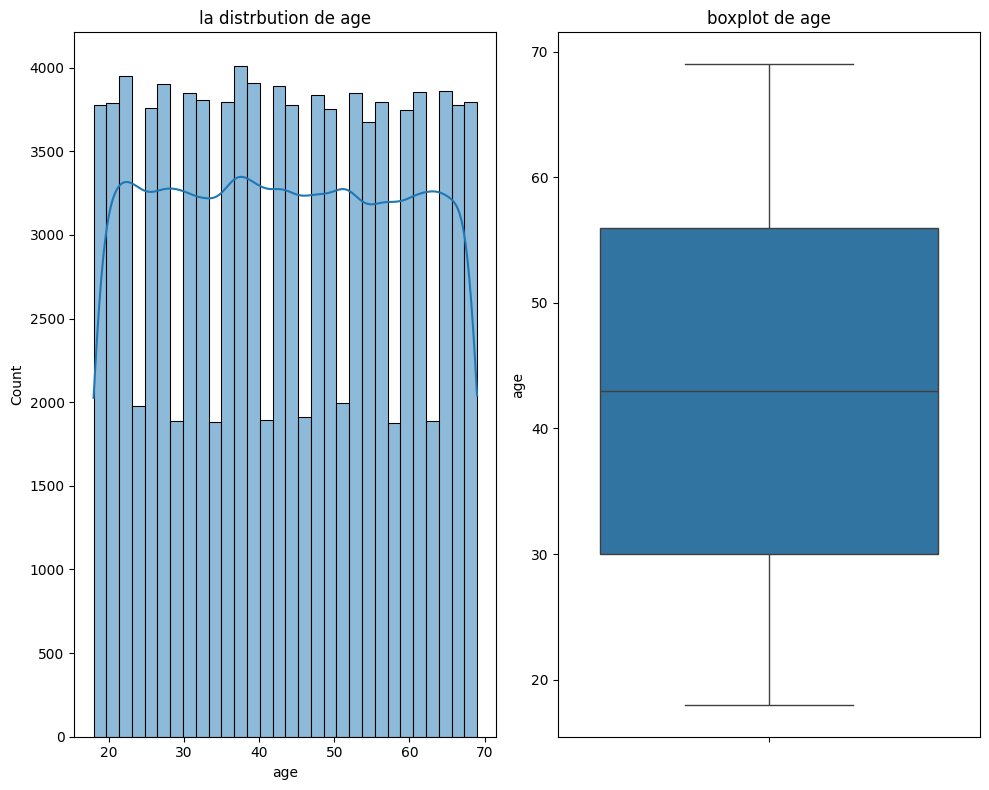

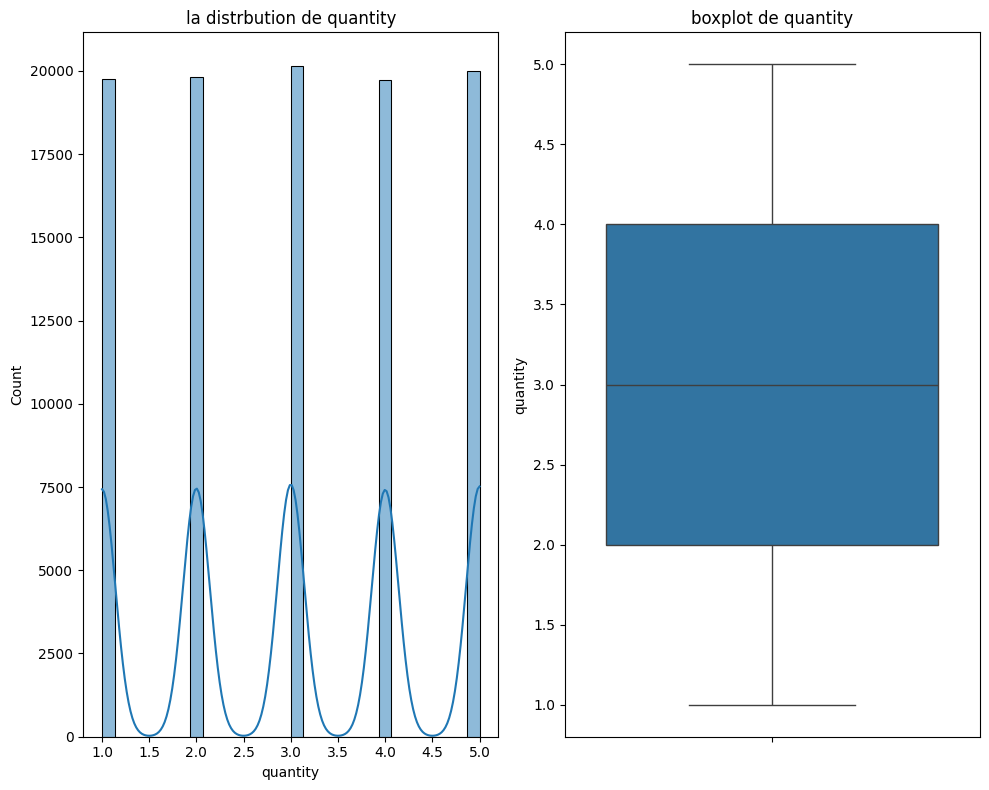

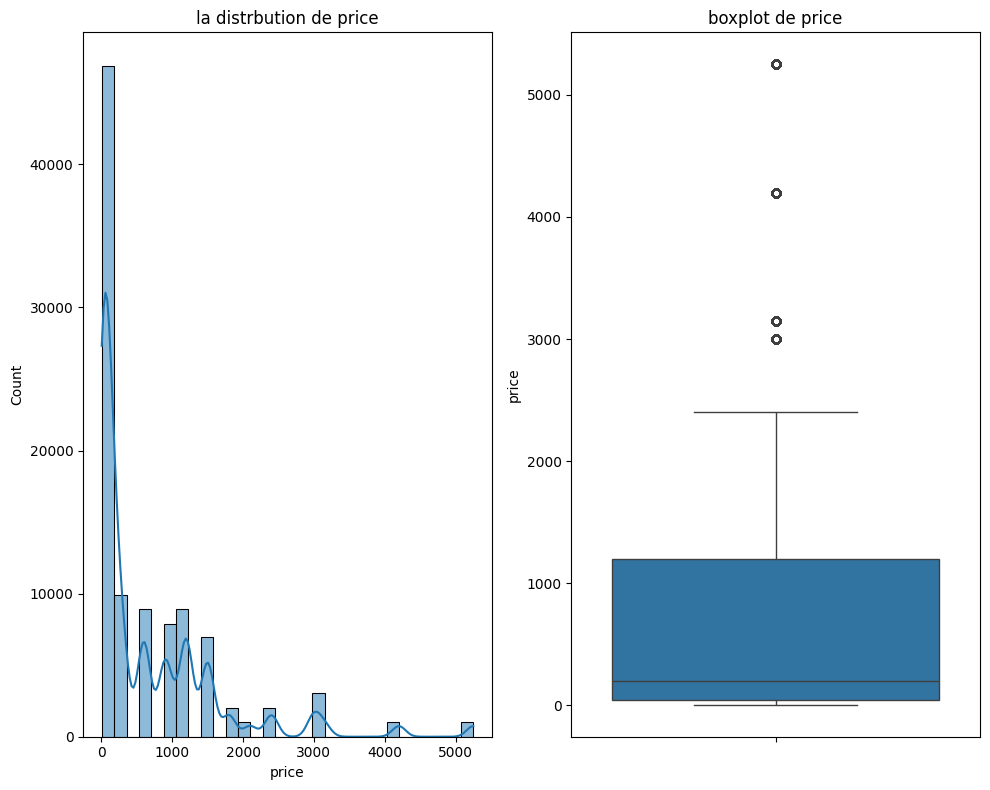

In [35]:
for  col  in num_clo :

    plt.figure(figsize=(10,8))

    # Histogramme 

    plt.subplot(1,2,1)
    sns.histplot(data[col],kde=True, bins=30)
    plt.title(f'la distrbution de {col}')


    # Boxplot

    plt.subplot(1,2,2)
    sns.boxplot(data[col])
    plt.title(f'boxplot de {col}')

    plt.tight_layout()
    plt.show()

variable  categoriles

In [36]:
cat_col = data.select_dtypes(include=['object']).columns

In [37]:
cat_col

Index(['cpinvoice_no', 'customer_id', 'gender', 'category', 'payment_method',
       'invoice_date', 'shopping_mall'],
      dtype='object')

In [38]:
# for  col in cat_col :
     
#      plt.figure(figsize=(10,8))
#      sns.countplot(data[col])
#      plt.title(f'repartition de {col}')
#      plt.xticks()
#      plt.show()

In [47]:
data

,cpinvoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


correlation 

In [49]:
data_corr = data.select_dtypes(include=np.number)

In [50]:
data_corr.corr()

,age,quantity,price
age,1.000000,0.000667,0.001694
quantity,0.000667,1.000000,0.344880
price,0.001694,0.344880,1.000000


# visulization  party 

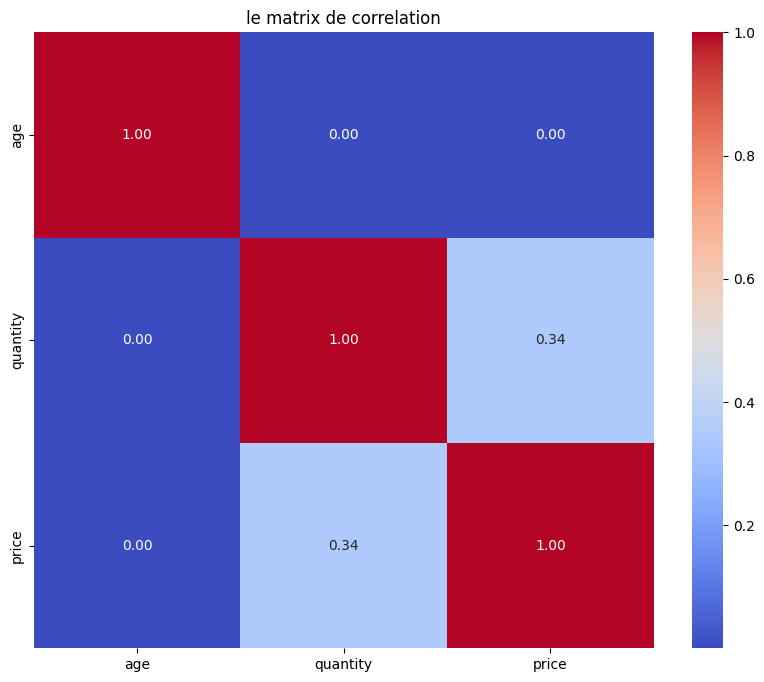

In [52]:
plt.figure(figsize=(10,8))
sns.heatmap(data_corr.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title(f'le matrix de correlation')
plt.show()

how  can I import all  models  

In [53]:
# preprocessing 

from sklearn .model_selection   import  train_test_split
from sklearn.preprocessing  import  StandardScaler ,LabelEncoder
# clustring 

from sklearn.cluster import  k_means
from  sklearn.metrics  import accuracy_score ,recall_score, precision_score ,roc_auc_score

# classification  model  

from sklearn.linear_model  import  LogisticRegression
from  sklearn.ensemble import RandomForestClassifier
 

In [54]:
!pip install xgboost lightgbm


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 MB 2.5 MB/s eta 0:00:0000:0100:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 1.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [lightgbm]1/2 [lightgbm]

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [ ]:
import xgboost  as  xgb  
import  lightgbm as gbm  


In [58]:
data_corr.columns

Index(['age', 'quantity', 'price'], dtype='object')

In [59]:
y =  data_corr["price"]
x = data_corr.drop("price",axis=1)


In [64]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2 ,random_state=42) 

In [62]:
from  sklearn.linear_model  import LinearRegression


In [63]:
model  = LinearRegression()

In [65]:
scaler  = StandardScaler()

In [66]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [67]:
model_train = model.fit(x_train,y_train)

In [68]:
y_pred = model_train.predict(x_test)

In [72]:
from sklearn.metrics import  r2_score ,mean_squared_error

In [75]:
print('coffecient (pents)', model_train.coef_)
print('cofienent intercept ',model_train.intercept_)
print('MSE', mean_squared_error(y_test,y_pred))
print('R2 score',r2_score(y_test,y_pred))

coffecient (pents) [  1.37222319 324.03723771]
cofienent intercept  690.1498397536606
MSE 794965.7345421421
R2 score 0.11841823266828855
